# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

In [ ]:
 name_output = input('enter the name of your output file ').strip()

enter the name of your output file InceptionV3_2_softmax



# Import Modules

In [ ]:
import tensorflow as tf

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape, Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Recall, Precision,TruePositives,TrueNegatives, FalsePositives,FalseNegatives,Accuracy

In [ ]:
import os
import shutil
import glob

import random
import warnings

In [ ]:

# warnings.simplefilter(action='ignore',category='FutureWarning')

In [ ]:
print('hi')

hi


In [ ]:
# print("GPU Name:", tf.config.list_physical_devices('GPU')[0])

# Add GPU

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
if len(physical_devices) >=1:
    tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


# Make your Edits

In [ ]:
## change home directory
home = '/content/drive/MyDrive/Projects/CXR'

image_zip = 'chest_xray.zip'

model_name = 'InceptionV3'

this_model_name =  name_output+'.h5'

# Pull Data and Setup

In [ ]:
image_path =  'data'
# os.mkdir(image_path)

# shutil.copy(os.path.join(home,'data',image_zip),image_zip)

In [ ]:
# shutil.unpack_archive(image_zip,os.getcwd(),'zip')

## Create Path and arrange

In [ ]:
# prompt: ## move test folder from the unzipped folder to the data folder.

# shutil.move('test',image_path)


In [ ]:
# # prompt: ## create 3 more folders in the data folder

# os.mkdir(os.path.join(image_path,'train'))
# os.mkdir(os.path.join(image_path,'validate'))
# os.mkdir(os.path.join(image_path,'withhold'))


In [ ]:
input_dir = 'train'
train_dir = 'data/train'
val_dir = 'data/validate'
held_dir = 'data/withhold'

### Move data

In [ ]:
# # Set the split ratios
# train_ratio = 0.8
# val_ratio = 0.1
# held_ratio = 0.1

# # Set the random seed for reproducibility
# seed = 42
# random.seed(seed)

# # Create the output directories if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(held_dir, exist_ok=True)

# # Loop through each class folder in the input directory
# for class_name in os.listdir(input_dir):
#     class_dir = os.path.join(input_dir, class_name)

#     if os.path.isdir(class_dir):
#         # Create corresponding class directories in the output folders
#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(held_dir, class_name), exist_ok=True)

#         # Get all file names in the current class directory
#         file_names = os.listdir(class_dir)
#         random.shuffle(file_names)  # Shuffle the file names

#         # Calculate the split indices
#         total_files = len(file_names)
#         train_end = int(train_ratio * total_files)
#         val_end = train_end + int(val_ratio * total_files)

#         # Split the files
#         train_files = file_names[:train_end]
#         val_files = file_names[train_end:val_end]
#         held_files = file_names[val_end:]

#         # Move files to their respective directories
#         for file_name in train_files:
#             shutil.move(os.path.join(class_dir, file_name), os.path.join(train_dir, class_name, file_name))

#         for file_name in val_files:
#             shutil.move(os.path.join(class_dir, file_name), os.path.join(val_dir, class_name, file_name))

#         for file_name in held_files:
#             shutil.move(os.path.join(class_dir, file_name), os.path.join(held_dir, class_name, file_name))

# print("Data split and moved successfully!")


In [ ]:
# os.mkdir(os.path.join(image_path,'train'))
# # os.mkdir(os.path.join(image_path,'test'))
# os.mkdir(os.path.join(image_path,'valid'))

In [ ]:
# prompt: move test folder from home firectory to data

# shutil.move(os.path.join(home,'data','test'),os.path.join(image_path,'test'))


## Bring data back

In [ ]:
# prompt: copy os.path.join(home, 'data','data') to the current directory with python

shutil.copytree(os.path.join(home, 'data','data'), 'data')


'data'

In [ ]:
# prompt: check in data the number of items in both folders in train

normal_train_len = len(os.listdir('data/train/NORMAL'))
pneumonia_train_len = len(os.listdir('data/train/PNEUMONIA'))
print('NORMAL:', normal_train_len)
print('PNEUMONIA:', pneumonia_train_len)


NORMAL: 3216
PNEUMONIA: 3100


# Funtions

### Plot Confusion matrix

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title='Confusion matrix',
                          cmap = plt.cm.Blues):
  """
  this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  """
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tickmarks=  np.arange(len(classes))
  plt.xticks(tickmarks,classes,rotation=45)
  plt.yticks(tickmarks,classes)
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1) [:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix without normalization')

  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,cm[i,j],
             horizontalalignment='center',
             color = 'white' if cm[i,j] > thresh else 'black'
             )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

# Instantiate the Base Model

In [ ]:
input_shape = (224, 224, 3)

In [ ]:
Home_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False,input_shape=input_shape)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Preprocess

In [ ]:

import numpy as np
def prepare_image(file):
  img = image.load_img(file, target_size=(224, 224))  # InceptionV3 input size
  img_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.inception_v3.preprocess_input(img_array_expanded)


## Pull data

In [ ]:
train_path = os.path.join(image_path,'train')
valid_path = os.path.join(image_path,'validate')
test_path = os.path.join(image_path,'test')

In [ ]:
## add augmentations similar to above one  here

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
                                   rotation_range = 10, shear_range=0.1, zoom_range = 0.1 )\
              .flow_from_directory(directory= train_path,target_size=(224,224),batch_size=10, class_mode ='categorical')

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)\
              .flow_from_directory(directory= valid_path,target_size=(224,224),batch_size=10,  class_mode ='categorical')

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)\
              .flow_from_directory(directory= test_path,target_size=(224,224),batch_size=10, shuffle = False,  class_mode ='categorical')


Found 6316 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
labels = train_batches.class_indices
print(labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


## Transfer Learning

In [ ]:
Home_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
len(Home_model.layers)

311

Attempt v1

Code

```
x = Home_model.layers[-2].output
s2l = Reshape((-1,))(x)
s2l = Model(inputs= Home_model.input,outputs = s2l)
s2l = Dense(units=512,activation='relu')(s2l.output)
output = Dense(units=2,activation='sigmoid')(s2l)

```

Result

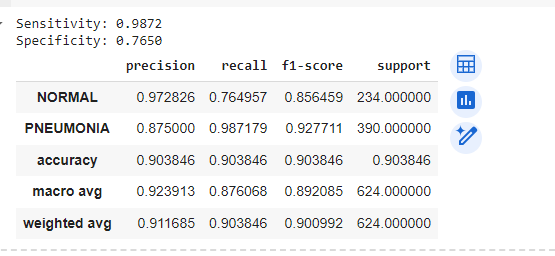

In [ ]:
#




CODE

```
x = Home_model.layers[-2].output
# s2l = Reshape((-1,))(x)
# s2l = Model(inputs= Home_model.input,outputs = s2l)
# s2l = Dense(units=512,activation='relu')(s2l.output)
# output = Dense(units=2,activation='sigmoid')(s2l)

```

RESULT

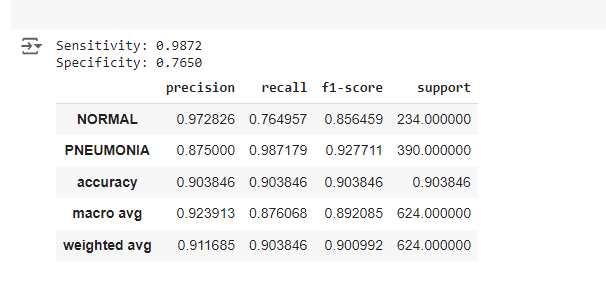

In [ ]:
# prompt: to the homel model output addd a dense with a differenct activation function, a conv2d a global average2d a drop out and a dense  with 2 units and  sigmoid activation

x = Home_model.layers[-2].output
x = Dense(units=512, activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Dropout layer
x = Dense(units=32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = Dense(units=2, activation='softmax')(x)


In [ ]:
model = Model(inputs= Home_model.input,outputs = output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 16,231,810 (61.92 MB)

 Trainable params: 16,203,522 (61.81 MB)

 Non-trainable params: 28,288 (110.50 KB)

In [ ]:
for layer in model.layers[:-25]:
  layer.trainable= False

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 16,231,810 (61.92 MB)

 Trainable params: 756,130 (2.88 MB)

 Non-trainable params: 15,475,680 (59.04 MB)

In [ ]:
# prompt: plot the model

# tf.keras.utils.plot_model(model)


## Train The Model

In [ ]:
model.compile(
    optimizer =Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy',Recall(), Precision(),TruePositives(), FalseNegatives()]
)

In [ ]:
epochs=  40

In [ ]:
History = model.fit(
    x = train_batches,
    validation_data = valid_batches,
    epochs = epochs,
    verbose=2
    )


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


632/632 - 181s - 286ms/step - accuracy: 0.9132 - false_negatives: 548.0000 - loss: 0.2235 - precision: 0.9132 - recall: 0.9132 - true_positives: 5768.0000 - val_accuracy: 0.9693 - val_false_negatives: 16.0000 - val_loss: 0.0956 - val_precision: 0.9693 - val_recall: 0.9693 - val_true_positives: 505.0000
Epoch 2/40
632/632 - 165s - 261ms/step - accuracy: 0.9493 - false_negatives: 320.0000 - loss: 0.1424 - precision: 0.9493 - recall: 0.9493 - true_positives: 5996.0000 - val_accuracy: 0.9693 - val_false_negatives: 16.0000 - val_loss: 0.0738 - val_precision: 0.9693 - val_recall: 0.9693 - val_true_positives: 505.0000
Epoch 3/40
632/632 - 142s - 225ms/step - accuracy: 0.9607 - false_negatives: 248.0000 - loss: 0.1127 - precision: 0.9607 - recall: 0.9607 - true_positives: 6068.0000 - val_accuracy: 0.9731 - val_false_negatives: 14.0000 - val_loss: 0.0795 - val_precision: 0.9731 - val_recall: 0.9731 - val_true_positives: 507.0000
Epoch 4/40
632/632 - 145s - 229ms/step - accuracy: 0.9655 - false_

In [ ]:
history_df = pd.DataFrame(History.history)

In [ ]:
history_df.to_csv(os.path.join(home,'Outputs',name_output+'.csv'))

## Optionally Load Model

In [ ]:
# # prompt: Load a saved model and use

# from tensorflow.keras.models import load_model
# # Load the saved model
# model = load_model(os.path.join(home,'models',this_model_name))

# # Now you can use the loaded_model for predictions or further training
# # predictions = loaded_model.predict(test_batches)


# Predict

In [ ]:
test_labels= test_batches.classes

In [ ]:
x_test = np.concatenate([test_batches[i][0] for i in range(len(test_batches))])

In [ ]:
predictions = model.predict(  x = x_test,verbose=0)

In [ ]:
dff = pd.DataFrame(predictions)

In [ ]:
dff['test'] = test_labels
dff.head(10)

# Taking prediction proabilities to CSV

In [ ]:
dff.to_csv(os.path.join(home,'Outputs',name_output+'_prediction_probabilities.csv'))

## Confusion Matrix

In [ ]:
# y_pred = np.where(predictions >= 0.5, 1, 0)
y_pred = np.argmax(predictions, axis=1)
y_true=test_labels

In [ ]:
test_batches.class_indices
cm_plot_labels = [i for i in test_batches.class_indices.keys()]

In [ ]:
# prompt: make confusion matrix from y_pred and y_test store in cm

cm = confusion_matrix(y_true,y_pred)


In [ ]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title = 'confusion matrix')

## Metrics

In [ ]:
# prompt: given y_pred and y_true calculate importatnt metrics to 4 dps

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiclass
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print metrics to 4 decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


In [ ]:
# prompt: also add sensitivity and specificity metrics then do a classficaiton report to a df

import pandas as pd
from sklearn.metrics import classification_report

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity to 4 decimal places
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Generate classification report and convert to DataFrame
report = classification_report(y_true, y_pred, target_names=cm_plot_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame
report_df


# Save Model

In [ ]:
model.save(this_model_name)

In [ ]:
model_path = os.path.join(home,'models')
# home = '/content/drive/MyDrive/project/Tensorflow And Keras' #/content/drive/MyDrive/project/Project2.1/Script2_pure classification

In [ ]:
# prompt: shutil.move(this_model_name,model_path) if it exists overwrite

import os
import shutil



# Check if the file exists in the destination
if os.path.exists(os.path.join(model_path, this_model_name)):
  # If it exists, remove it (overwrite)
  os.remove(os.path.join(model_path, this_model_name))

# Move the file
shutil.move(this_model_name, model_path)


In [ ]:
shutil.move(this_model_name,model_path)